# Environment Tester - Windows

- Updated 07/27/23

>- The following notebook is meant to be a quick summary/verification of your computers environment.
>- Please run all of the cells to get all of the information displayed. 
    - Either Press `Shift + Enter` to run each cell 
    - OR Click on `Kernel`> `Restart & Run All`

## Conda

In [ ]:
## If the following cell errors, uncomment and run the following 2 linesL
# !pip uninstall tzlocal --y
# !pip install tzlocal

In [1]:
# ## Exporting Troubleshooting report
%run "Troubleshooting\\Troubleshooting Report.ipynb"

# with open("FINAL_REPORT.txt") as f:
# 	final_report = f.read()
# # print(final_report)

In [2]:
## Recording time notebook was run
import datetime as dt
from tzlocal import get_localzone, get_localzone_name
now = dt.datetime.now(get_localzone())
now_nice = now.strftime("%m/%d/%Y @ %I:%M:%S %p ") + f"(tz={get_localzone_name().split('/')[-1]})"
print(f'[i] Environment Tester Notebook started at: {now_nice}')

[i] Environment Tester Notebook started at: 07/27/2023 @ 02:32:58 PM (tz=New_York)


In [ ]:
## GET CURRENT ENVIRONMENT INFO
%conda info

In [ ]:
## CHECK PYTHON VERSION (should be 3.10)
!python --version

In [ ]:
## Folder path to python
!which python

In [ ]:
## Home folder
import os
print(os.environ['HOME'])

## Python Packages

In [ ]:
# 1.5.3
import pandas as pd
pd.__version__

In [ ]:
# 1.23.4
import numpy as np
np.__version__

In [ ]:
# 3.7.1
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.__version__

In [ ]:
# 0.12.2
import seaborn as sns
sns.__version__

In [ ]:
# 1.2.2
import sklearn as sk
from sklearn.preprocessing import StandardScaler
sk.__version__

In [ ]:
# 1.10.1
import scipy as sp
from scipy import stats
sp.__version__

In [ ]:
# 1.0.3
import pymysql
pymysql.__version__

In [ ]:
# 0.13.5
import statsmodels
import statsmodels.api as sm
statsmodels.__version__

In [ ]:
# 2.0.3
import pmdarima as pmd
pmd.__version__

In [ ]:
# 0.41.0
import shap
shap.__version__

In [ ]:
# 0.10.0
import imblearn
imblearn.__version__

In [ ]:
# # 0.6.7
# import dython 
# dython.__version__

In [ ]:
## As long as m1 mac installed the m1 env, this should work
# should be 2.9.1 (or 2.12)
try:
    import tensorflow as tf
    print(tf.__version__)
except Exception as e: 
    display(e)

In [ ]:
# 1.1.3
import sklearn
sklearn.__version__

## Shell/Terminal

In [ ]:
import os

# shell = !echo $SHELL
shell = os.environ['SHELL']
shell

In [ ]:
# path
os.environ['PATH']

In [ ]:
# python path
# os.environ['PYTHONPATH']

### Display the Profile For Your Terminal/GitBash

In [ ]:
!whoami

In [ ]:
import os
# ## Checking .bash_profile or .zshrc
# if 'zsh' in shell[0]:
#     print(f'[i] Using .zshrc')
#     fname = r"~/.zshrc"
# else:
#     print(f'[i] Using .bash_profile')
fname = r"~/.bash_profile"
    
profile = !cat {fname}
print('\n'.join(profile))

# Package Tests

In [ ]:
import pandas as pd
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRsXeEswMPJqEh9xpXed0eJYaQf_aKkNCypU4TKvGrS_hucLW2IWUxrVBjlKQJR4Z_EQFE-YR4UUuTz/pub?output=csv",
                index_col=0)
df

### Pandas Optional Dependencies

### to_markdown

In [ ]:
print(df.head().to_markdown())

### xlsxwriter

In [ ]:
pd.ExcelWriter('test.xlsx')

## Pandas Profiling 

In [ ]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(df)
# report

## MODELING

### Scikit-learn v.1

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

In [ ]:
## dropping column that are not helpful
bad_cols = ['Name','Ticket']
df.drop(columns=bad_cols,inplace=True)

In [ ]:
## Specifying root names of types of features to loop through and filter out from df
target_col = 'Survived'
drop_cols = ['Cabin']

y = df[target_col].copy()
X = df.drop(columns=[target_col,*drop_cols]).copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=321)
y_train.value_counts(1)

In [ ]:
## feature selectors
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')

In [ ]:
## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore',
                             drop='first'))])
                           
                           
                           
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_sel),
    ('cat',cat_transformer,cat_sel)], verbose_feature_names_out=False)

preprocessor

In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)
X_train_df = preprocessor.transform(X_train)
X_test_df = preprocessor.transform(X_test)
# feature_names = preprocessor.get_feature_names_out()
# ## Transform X_traian,X_test and remake dfs
# X_train_df = pd.DataFrame(preprocessor.transform(X_train),
#                           index=X_train.index, columns=feature_names)
# X_test_df = pd.DataFrame(preprocessor.transform(X_test),
#                           index=X_test.index, columns=feature_names)
X_train_df

In [ ]:
def evaluate_classification(model,X,y_true, classes=None, normalize='true',
                            cmap="Blues",  label="Test Data", figsize=(5,3)): 

    ## Get Predictions
    y_pred = model.predict(X)
    
    ## Classification Report / Scores 
    dashes = '---'*20
    print(dashes)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print(dashes)
    
    print(metrics.classification_report(y_true,y_pred,
                                        target_names=classes))
    # print(dashes)
    

    ## Plot a confusion matrix
    fig, ax = plt.subplots(figsize=figsize)
    metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred,
                                                         normalize=normalize,
                                                        cmap=cmap,ax=ax)


    if classes != None:
        ## Label classes
        ax.set_xticklabels(classes)
        ax.set_yticklabels(classes,rotation=0)

    ## Add axis labels & title
    ax.set_ylabel('True Classes')
    ax.set_xlabel('Predicted Classes')
    ax.set_title('Confusion Matrix');
    plt.show()
    
    
    

In [ ]:
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_df,y_train)
evaluate_classification(rf,X_test_df,y_test)

## MODEL EXPLANATIONS

### Shap

In [ ]:
import shap 
print(shap.__version__)
shap.initjs()

In [ ]:
## Initialize an explainer with the model
explainer = shap.TreeExplainer(rf)

## Calculaate shap values for test data
shap_values = explainer.shap_values(X_test_df,y_test)
len(shap_values)

In [ ]:
shap.summary_plot(shap_values[1],X_test_df,max_display=40)

### Lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer =LimeTabularExplainer(
    training_data=np.array(X_test_df),
    feature_names=X_test_df.columns,
    class_names=['Died', 'Survived'],
    mode='classification'
)

row = np.random.choice(range(len(X_test_df)))
target_lookup = {0:'Died',1:'Survived'}

print(f"- Row #: {row}")
print(f"Class = {target_lookup[y_test.iloc[row]]}")

exp = lime_explainer.explain_instance(X_test_df.iloc[row], rf.predict_proba)
exp.show_in_notebook(show_table=True)

## ADVANCED MODELING

### XGBoost

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train_df, y_train)
evaluate_classification(rf,X_test_df,y_test)

### LightGBM

In [ ]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(X_train_df, y_train)
evaluate_classification(rf,X_test_df,y_test)

## Time Series

In [ ]:
df_crime = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVbSOFab3WcS31FfOdDE7pYxSuo_O7epFxACZElgwUt1gId7qPtn7krQbp39NyAwoAtR7aTdYYtDOw/pub?output=csv',
                parse_dates=['CrimeDateTime'],index_col=0)
display(df_crime.head())
df_crime.index

In [ ]:
## Pick a time series from above to work with
ts = df_crime['LARCENY']
ts.plot(figsize=(12,3))

In [ ]:
ts = ts.resample('M').sum().loc[:"2021"]
ts.plot(figsize=(12,3))

### Statsmodels.tsa

In [ ]:
import statsmodels.tsa.api as tsa
## import seasonal_decompose
decomp_mul = tsa.seasonal_decompose(ts,model='mul')#,model='mul')

mpl.rcParams['figure.figsize']=(12,6)
decomp_mul.plot();

In [ ]:
## Train Test Split Index
train_size = 0.8
split_idx = round(len(ts)* train_size)
split_idx

## Split
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

## Visualize split
fig,ax= plt.subplots()
kws = dict(ax=ax,marker='o')
train.plot(**kws)
test.plot(**kws)
ax.legend(bbox_to_anchor=[1,1])

In [ ]:
import statsmodels.tsa.api as tsa
d = 1
p = 1
q =1
model = tsa.SARIMAX(train,order=(p,d,q),).fit()
display(model.summary())
model.plot_diagnostics();

In [ ]:
from sklearn import metrics
forecast = model.forecast(steps=len(test))
forecast

In [ ]:
## Getting a forecast
forecast = model.get_forecast(len(test))


def forecast_to_df(forecast, name='forecast'):
    test_pred = forecast.conf_int()
    test_pred[name] = forecast.predicted_mean
    test_pred.columns = ['lower','upper','prediction']
    return test_pred


pred_df = forecast_to_df(forecast)#,district)
pred_df

In [ ]:
fig, ax = plt.subplots()
train.plot(ax=ax,label='train')
test.plot(ax=ax,label='test')

pred_df['prediction'].plot(ax=ax,label='forecast',ls='--')

ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'])
ax.legend()

## pmdarima

In [ ]:
import pmdarima
# help(pmdarima.auto_arima)

In [ ]:
auto_model = pmdarima.auto_arima(train,start_p=0,start_q=0)
display(auto_model.summary())
# help(auto_model
auto_model.plot_diagnostics();

In [ ]:
pred_mean,pred_conf_int = auto_model.predict(return_conf_int=True)
pred_mean 

In [ ]:
pred_df = pd.DataFrame({'pred':pred_mean, 
                        'conf_int_lower':pred_conf_int[:,0],
                        'conf_int_upper':pred_conf_int[:,1]},
                        index= pd.date_range(test.index[0],
                                                  periods=10,freq='M'))
# auto_model.conf_int()
pred_df

In [ ]:
best_model = tsa.SARIMAX(ts,order=auto_model.order,
                     seasonal_order=auto_model.seasonal_order).fit()
display(best_model.summary())
best_model.plot_diagnostics();

In [ ]:
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots()
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['prediction'],label='prediction',ls='--',**kws)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'])
    ax.legend(bbox_to_anchor=[1,1])
    fig.tight_layout()
    return fig,ax


In [ ]:
pred = best_model.get_forecast(steps=12)#start=test.index[0],end=test.index[-1])
pred_df = forecast_to_df(pred)
display(plot_train_test_pred(train,test,pred_df))

## Pandas DataReader


In [ ]:
import pandas_datareader as pdr
try:
    example = pdr.DataReader('GOOGL','yahoo','2012','2020')
    display(example.head(10))
except: 
    print('[!] There is a back-end issue with Pandas DataReader and Yahoo finance (as of 12/22/22).')
    print("\t- So don't worry... your env is fine!")

## Computer Vision

<img src="images/Data Science Thumbnail.png" width=200px>

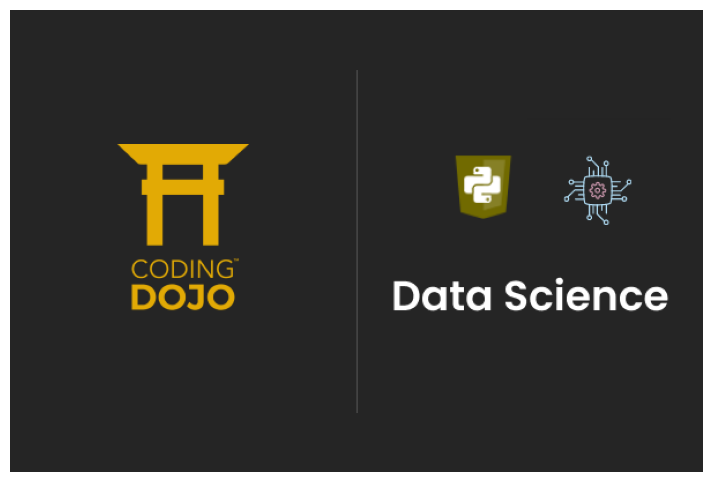

In [66]:
import cv2 as cv
import matplotlib.pyplot as plt
fpath = r"Test Files/Data Science Thumbnail.png"

# Open image with opencv2 
img = cv.imread(fpath)
ax = plt.imshow(img)
ax.axes.axis('off');

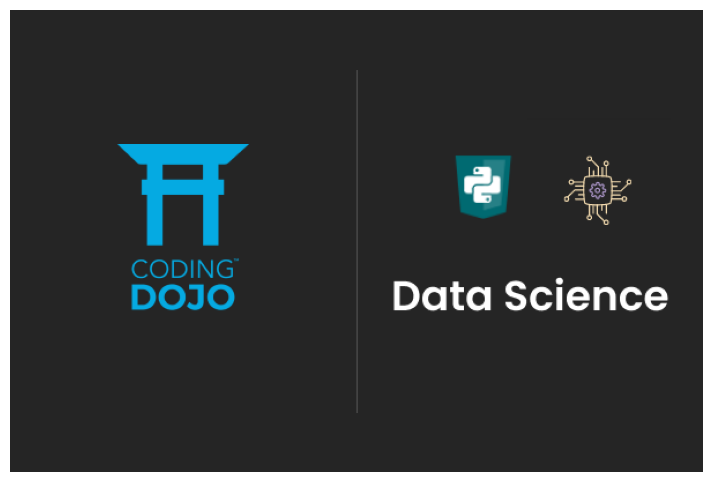

In [68]:
#Image reads in as BLUE, GREEN, RED
#Matplotlib assumed RED, GREEN, BLUE
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax = plt.imshow(image_rgb)
ax.axes.axis('off');

## Webscraping

In [69]:
import requests, bs4
from IPython.display import display,HTML
try:

    url = "https://en.wikipedia.org/wiki/Data_science"
    response = requests.get(url)

    with open("Test Files/wikipedia-data-science.html", "wb") as f:
        f.write(response.content)
        
except Exception as e:
    display(e)
    
finally:
    
    with open("Test Files/wikipedia-data-science.html",'r') as f:
        html = f.read()

In [70]:
soup = bs4.BeautifulSoup(html)
body = soup.find_all(attrs={'id':'bodyContent'})[0]
doc = body.text

In [71]:
display(HTML(str(body)[:5000]))

## NLP

In [72]:
from nltk import wordpunct_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

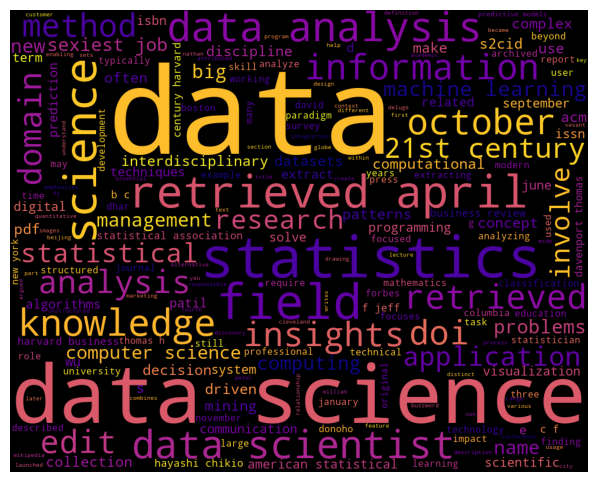

In [73]:
# Tokenize text
tokens = wordpunct_tokenize(doc.lower())

## Initalize a WordCloud with bigrams
wordcloud = WordCloud(stopwords=STOPWORDS,width=1000, height=800, 
                      collocations=True,colormap='plasma')
wordcloud.generate(','.join(tokens),)
ax = plt.imshow(wordcloud)
ax.axes.axis('off');

In [74]:
## BIGRAMS
import nltk
import string

stopwords_list = list(string.punctuation) +list('0123456789') + list(STOPWORDS)

tokens = nltk.wordpunct_tokenize(doc)
stopped_tokens = [t.lower() for t in tokens if  t.lower() not in stopwords_list]
freq = nltk.FreqDist(stopped_tokens)
freq.most_common(10)

[('data', 157),
 ('science', 83),
 ('.[', 36),
 (').', 33),
 ('statistics', 27),
 ('retrieved', 25),
 ('".', 24),
 ('analysis', 21),
 ('april', 17),
 ('2020', 17)]

In [75]:
# To find bigrams, need a Measures and a Finder
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.BigramCollocationFinder.from_words(tokens)#, window_size=3)

# Use the bigram_measures the score the finder
tokens_scored = bigram_finder.score_ngrams(bigram_measures.pmi)#bigram_measures.pmi)
df_bigrams_pmi =  pd.DataFrame(tokens_scored,
                               columns=['Words','PMI'])
df_bigrams_pmi = df_bigrams_pmi.set_index('Words')
df_bigrams_pmi.head(10)

,PMI
Words,
"(&, oldid)",11.767771
"(2001, paper)",11.767771
"(2005, report)",11.767771
"(://, en)",11.767771
"(Amstat, News)",11.767771
"(Analytic, Thinking)",11.767771
"(Andrew, Gelman)",11.767771
"(Award, winner)",11.767771
"(Ben, Fry)",11.767771


# Visualizations

## Plotly

In [ ]:
import plotly.express as px
px.line(data_frame=df_crime)

## Sklearn `plot_tree`


In [ ]:
from sklearn.tree import plot_tree
tree = rf.estimators_[0]
plot_tree(tree, filled=True);

## Yellowbrick

In [ ]:
import yellowbrick as yb
yb.reset_orig()

In [ ]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

# Final Confirmation

- You should see the success message printed below the last code cell. 


- If the message did not print, your notebook ran into an error somewhere above. 
	- Scroll up to find the last cell that ran.
	- If an error message is displayed, follow the steps below to save a copy of the notebook to send to an instructor for help.

### Files to Share for Troubleshooting

- There are 2 files that you should share with your instructor/TA
	1. A copy of your Environment Tester notebook that error'd.
	2. A copy of "FINAL_REPORT.txt" file that is in the Troubleshooting folder of the repo.
	
1. To share your notebook with an instructor/TA for help:
	- Click File > Save & Checkpoint.
	- Click File > Download As > Notebook (.ipynb)
	- You web browser should save a copy of the notebook to your normal "Downloads" folder.
    
<img src="images/download_as.png" width=600px>

2. To share a copy of your FINAL_REPORT.txt:
	- In the first Files tab that opened when you started jupyter notebook you should see a folder called "Troubleshooting"
	- Click on the troublshooting folder. 
	- Inside the folder you should have a file called "FINAL_REPORT.txt".
	- Check the checkbox next to the file and the click on the "Download" button that appears at the top of the list of files.
	- Your web browser will also save this file to your Downloads folder.
    
<img src="images/download_report.png" width=600px>

- **Post your question on the [ds-python-installation](https://discord.com/channels/738494436467539968/999108307627294770) Discord channel and tag your instructor in your question (e.g. @dojo_instructor_name).**
	- Attach the 2 files listed above.
	- Add any additional details or info you think may be helpful for us to know.
		- For example:
			- "my computer is really old and I think that may be part of the problem."
			- "I share this computer with someone else who also uses python"
	
- An instructor or TA will get back to you within 1 business day with the next steps for you to try.
	- You will most likely need to set up a Zoom call and share your screen for us to help.
	

In [ ]:
print(f"[i] SUCCESS. YOUR ENVIRONMENT IS FULLY FUNCTIONAL AND READY TO USE!")
end = dt.datetime.now(get_localzone())
end_nice = end.strftime("%m/%d/%Y @ %I:%M:%S %p ") + f"(tz={get_localzone_name().split('/')[-1]})"
print(f'    - Time Completed: {end_nice}')

duration = end-now
print(f'    - Total Time = {(end-now) } ("HH:MM:SS.ms")')